In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


# IMPORTING ALL THE USEFUL AND IMPORTANT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from time import time

![](https://synrad.com.au/wp-content/uploads/2019/12/Heart.jpg)

# LOADING THE DATASET

In [3]:
heart_data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [4]:
heart_data.head() #displaying head of the .csv file

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# SOMETHING ABOUT THE DATA
age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [5]:
heart_data.describe() #some essential details about the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data.isnull().sum() #checking whether any missing values are present or not

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Renaming all the columns of the dataset to convenient and understandable names

heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 
              'exercise_induced_angina', 'st_depression', 
              'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [8]:
heart_data.head() #displaying head of the .csv file

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#Changing cateogorcial data to 'string' type categorical data

heart_data['sex'][heart_data['sex'] == 0] = 'female'
heart_data['sex'][heart_data['sex'] == 1] = 'male'

heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 1] = 'typical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 2] = 'atypical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 3] = 'non-anginal pain'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 4] = 'asymptomatic'

heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_data['rest_ecg'][heart_data['rest_ecg'] == 0] = 'normal'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 0] = 'no'
heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 1] = 'yes'

heart_data['st_slope'][heart_data['st_slope'] == 1] = 'upsloping'
heart_data['st_slope'][heart_data['st_slope'] == 2] = 'flat'
heart_data['st_slope'][heart_data['st_slope'] == 3] = 'downsloping'

heart_data['thalassemia'][heart_data['thalassemia'] == 1] = 'normal'
heart_data['thalassemia'][heart_data['thalassemia'] == 2] = 'fixed defect'
heart_data['thalassemia'][heart_data['thalassemia'] == 3] = 'reversable defect'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Int

In [10]:
heart_data.head() #displaying head of the .csv file

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


# ENCODING CATEGORCIAL DATA

In [11]:
heart_data = pd.get_dummies(heart_data, drop_first=True) 

#changing the categorical data to binary categorical data
#removing the first column of the binary categorical data

In [12]:
heart_data.head() #displaying head of the .csv file

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [13]:
# Splitting the dataset into train and test datasets
# 80% Train Data + 20% Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop('target', 1), heart_data['target'], test_size = .2)

# CREATING THE ANN

In [14]:
model = Sequential([Dense(units=10,input_shape=(19,),activation='relu'),
                    Dense(units=20,activation='relu'),
                    Dense(units=20,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=30,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=35,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=2,activation='sigmoid')])

In [15]:
#Getting a gist about the neural network just created

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                630       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 35)                1

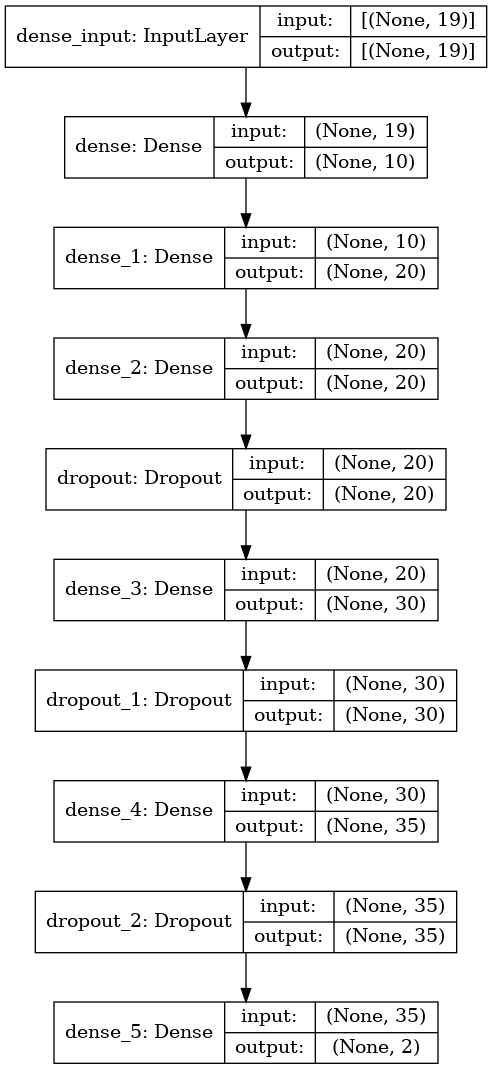

In [16]:
#Flowchart Representation of the Neural Netwrok just created

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [17]:
#Getting the Neural Network ready by setting hyperparameters like Learning Rate, Loss Function and Optimizer

model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# STARTING THE TRAINING

In [18]:
''' Starting the training of the ANN by initializing Feature Train Set and Label Train Set,
    batch size(No. of data-points that will go at once into the ANN and loss would be evaluated on them followed by back propagation), 
    number of epochs(No. of times the whole dataset would pass through the ANN),
    shuffle=True(so that ANN does not learn any unwanted patterns from the dataset)
'''

history = model.fit(
      x=X_train
    , y=y_train
    , batch_size=30
    , epochs=8000
    , shuffle=True
    , verbose=0
)

# TRANING GRAPHS

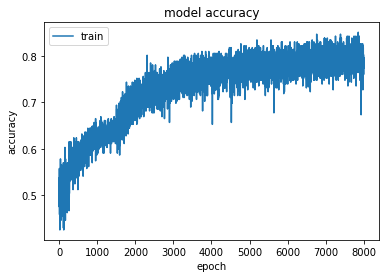

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

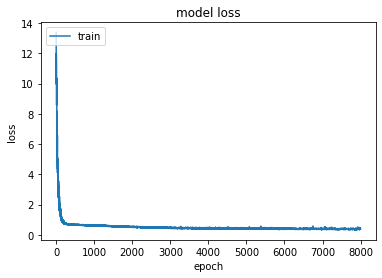

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CREATING CONFUSION MATRIX

In [21]:
#Function for plotting Confusion Matrix

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MAKING PREDICTIONS

In [22]:
#Making predictions on the unknown Test Dataset batch-by-batch

predictions = model.predict(
      x=X_test
    , batch_size=30
    , verbose=0
)

In [23]:
#Rounding-off the predictions to 0s and 1s

rounded_predictions = np.argmax(predictions, axis=-1)

In [24]:
#Feeding parameters in the CM Function

cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [25]:
#Labels for the CM

cm_plot_labels = ['No Heart Disease','Heart Disease']

# PLOTTING THE CONFUSION MATRIX

Confusion matrix, without normalization
[[24  3]
 [ 5 29]]


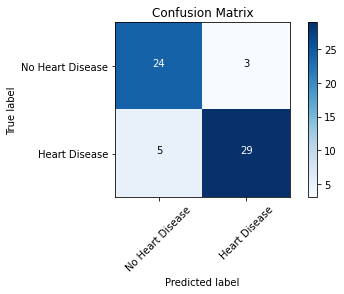

In [26]:
#Plotting the CM

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# SENSTIVITY

In [27]:
#Calculating Senstivity (Basically, this is the metric that is really important for medical diagnosis)
#Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive).
#Senstivity = True Positives / (True Positives + False Negatives)

senstivity = cm[1][1]/(cm[1][1]+cm[1][0])
senstivity * 100

85.29411764705883

# SPECIFICITY

In [28]:
#Calculating Specificity
#Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).
#Specificity = True Negatives / (True Negatives + False Positives)

specificity = cm[0][0]/(cm[0][0]+cm[0][1])
specificity * 100

88.88888888888889

**ACCORDING TO SENSTIVITY(RECALL), THE MODEL HAS DONE PRETTY WELL ON A MEDICAL RELATED DATASET AND HAS LOW CHANCES OF GIVING FALSE NEGATIVES AS PREDCITION RESULTS**